In [1]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [2]:
#データの読み込み
anime_data = pd.read_csv("./anime.csv")
rating_data = pd.read_csv("./rating.csv")
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
rating_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<AxesSubplot:>

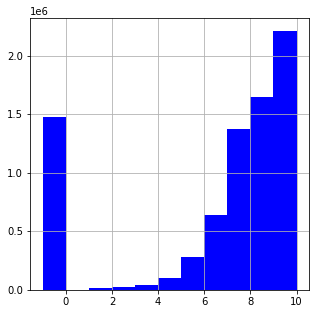

In [5]:
#各評価値のおおよその個数を確認
rating_data["rating"].hist(bins=11, figsize=(5, 5), color="b")

In [6]:
#回答していないことを表す-1をNaNに変換
rating_data.replace(-1, np.nan, inplace=True)
rating_data.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [7]:
#トップ20の人気アニメの確認
anime_data.sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [8]:
#基本統計量の確認
print(anime_data.describe())
print(rating_data.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  6.337241e+06
mean   3.672796e+04  8.909072e+03  7.808497e+00
std    2.099795e+04  8.883950e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.897400e+04  1.240000e+03  7.000000e+00
50%    3.679100e+04  6.213000e+03  8.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [9]:
#データクレンジング
#レコメンド精度向上のために極端にmembersが少ないアニメを削除
new_anime_data = anime_data[anime_data["members"]>5000]
new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})

<ipython-input-9-2007e39366c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_anime_data["episodes"] = new_anime_data["episodes"].replace({"Unknown": "0"})


In [10]:
#new_anime_dataの欠損値の確認
print(new_anime_data.isnull().sum())

anime_id     0
name         0
genre        3
type         5
episodes     0
rating      74
members      0
dtype: int64


In [11]:
#欠損値の削除
new_anime_data = new_anime_data.dropna()
new_anime_data.isnull().sum()
new_anime_data
print(new_anime_data.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [12]:
#再度基本統計量を確認
print(new_anime_data.describe())

           anime_id       rating       members
count   3911.000000  3911.000000  3.911000e+03
mean   10648.833291     7.284019  5.421194e+04
std    10501.672838     0.679322  8.667340e+04
min        1.000000     2.000000  5.001000e+03
25%     1497.000000     6.880000  1.011850e+04
50%     6927.000000     7.320000  2.213100e+04
75%    17795.000000     7.720000  5.852800e+04
max    34240.000000     9.370000  1.013917e+06


In [13]:
# raitingの値が0以上の物み残す
rating_data = rating_data[rating_data["rating"] >= 0]
print(rating_data.describe())

            user_id      anime_id        rating
count  6.337241e+06  6.337241e+06  6.337241e+06
mean   3.674791e+04  8.902866e+03  7.808497e+00
std    2.101340e+04  8.882000e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898400e+04  1.239000e+03  7.000000e+00
50%    3.681500e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01


In [14]:
#データフレームを結内部結合
data = pd.merge(rating_data, new_anime_data, on = "anime_id", how="inner")
data.rename(columns={'rating_x': 'rating'}, inplace=True)
data.rename(columns={'rating_y': 'rating_mean'}, inplace=True)
data

,user_id,anime_id,rating,name,genre,type,episodes,rating_mean,members
0,1,8074,10.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6.0,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
...,...,...,...,...,...,...,...,...,...
6147485,72800,15227,10.0,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6147486,52145,32071,7.0,Gantz:O,"Action, Drama, Ecchi, Horror, Psychological, S...",Movie,1,7.34,8569
6147487,72800,32071,6.0,Gantz:O,"Action, Drama, Ecchi, Horror, Psychological, S...",Movie,1,7.34,8569
6147488,53061,31418,6.0,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439


In [15]:
data.describe()

,user_id,anime_id,rating,rating_mean,members
count,6.147490e+06,6.147490e+06,6.147490e+06,6.147490e+06,6.147490e+06
mean,3.670578e+04,8.952135e+03,7.843792e+00,7.710210e+00,1.901872e+05
std,2.102542e+04,8.905059e+03,1.551151e+00,6.381877e-01,1.911448e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.001000e+03
25%,1.894900e+04,1.195000e+03,7.000000e+00,7.330000e+00,5.184400e+04
50%,3.668800e+04,6.347000e+03,8.000000e+00,7.720000e+00,1.232170e+05
75%,5.487300e+04,1.422700e+04,9.000000e+00,8.170000e+00,2.657910e+05
max,7.351600e+04,3.424000e+04,1.000000e+01,9.370000e+00,1.013917e+06


In [16]:
data2 = data[['user_id', 'name', 'rating']]
data2 = data2[data2["user_id"] <= 10000]

In [17]:
#ユーザーID、アニメ名、ユーザー評価でピボットテーブルの作成
piv_rating = pd.pivot_table(data2, index=['user_id'], columns=['name'], values='rating')
piv_rating

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#標準化するためにそれぞれの評価値から平均を引く
#評価が一つのみ、または同じ評価をしたユーザーを全て削除

#値の正規化
piv_norm = piv_rating.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#評価しなかった人を表す0のみを含むすべての列を削除
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [19]:
#疎行列の作成
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [20]:
#cos類似度の行列を作成
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [21]:
#行列をデータフレームにする
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [22]:
#cos類似度の最も高いtop10のアニメを返す関数
def top_anime(anime_name):
    count = 1
    print('Similar show to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count += 1

In [23]:
#類似性の最も高いユーザー5人を返す関数
def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [24]:
#類似しているユーザーごとに最も評価の高いアニメを含むリストを作成し、アニメ名とリストに表示される頻度を返す関数
def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]

In [25]:
#類似しているユーザーの重み平均を計算して入力ユーザーの潜在的な評価を決定し表示する関数
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv_rating.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [26]:
#top_anime関数の確認
top_anime("Hunter x Hunter (2011)")

Similar show to Hunter x Hunter (2011) include:

No. 1: Fullmetal Alchemist: Brotherhood
No. 2: One Punch Man
No. 3: Steins;Gate
No. 4: Magi: The Kingdom of Magic
No. 5: Kiseijuu: Sei no Kakuritsu
No. 6: Haikyuu!! Second Season
No. 7: Code Geass: Hangyaku no Lelouch R2
No. 8: Shokugeki no Souma
No. 9: Shingeki no Kyojin
No. 10: Fate/Zero 2nd Season


In [27]:
#top_users関数の確認
top_users(52)

Most Similar Users:

User #4621, Similarity value: 0.29
User #8501, Similarity value: 0.29
User #822, Similarity value: 0.27
User #218, Similarity value: 0.27
User #8837, Similarity value: 0.26
User #569, Similarity value: 0.26
User #100, Similarity value: 0.25
User #1930, Similarity value: 0.24
User #3236, Similarity value: 0.23
User #2433, Similarity value: 0.23


In [28]:
#similar_user_recs関数の確認
similar_user_recs(52)

[('Code Geass: Hangyaku no Lelouch R2', 3),
 ('Dragon Ball', 2),
 ('Dragon Ball GT', 2),
 ('Code Geass: Hangyaku no Lelouch', 2),
 ('Fullmetal Alchemist: Brotherhood', 2)]

In [29]:
#predicted_rating関数の確認
predicted_rating("Hunter x Hunter (2011)", 52)

9.236825461918766

In [30]:
#ジャンルでone-hot-encodingを作成
one_hot_encoding_j = new_anime_data["genre"].str.get_dummies(sep=", ")

In [40]:
one_hot_encoding_t = pd.get_dummies(new_anime_data, columns=["type"])
one_hot_encoding_t.drop(columns=["anime_id", "name", "genre", "rating", "episodes", "members"], inplace=True)
one_hot_encoding_t

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12122,0,0,0,0,1,0
12207,0,0,0,1,0,0
12209,0,0,0,1,0,0
12213,0,0,0,1,0,0


In [57]:
#new_anime_dataとone_hot_encodingを結合
clustering_data = pd.concat([new_anime_data, one_hot_encoding_j, one_hot_encoding_t], axis=1)
clustering_data

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191,0,0,0,...,0,0,0,1,0,0,0,0,1,0
12207,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,0,0,0,...,0,0,1,0,0,0,0,1,0,0
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,0,0,0,...,0,0,1,0,0,0,0,1,0,0
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [58]:
#episodesをobjectからfloat型に変換
clustering_data["episodes"] = pd.to_numeric(clustering_data["episodes"], errors="coerce")

In [59]:
#episodesの統計量を確認
clustering_data["episodes"].describe()

count    3911.000000
mean       13.926106
std        36.535838
min         0.000000
25%         1.000000
50%        11.000000
75%        13.000000
max      1787.000000
Name: episodes, dtype: float64

In [79]:
#episodesを範囲に分けてダミー変数にする
clustering_data["episode_under_less1"] = clustering_data["episodes"].apply(lambda x: 1 if x <= 1 else 0)
clustering_data["episode_under_less5"] = clustering_data["episodes"].apply(lambda x: 1 if 1 < x <= 5 else 0)
clustering_data["episode_under_less12"] = clustering_data["episodes"].apply(lambda x: 1 if 5 < x <= 12 else 0)
clustering_data["episode_under_less36"] = clustering_data["episodes"].apply(lambda x: 1 if 12 < x <= 36 else 0)
clustering_data["episode_under_over"] = clustering_data["episodes"].apply(lambda x: 1 if x > 36 else 0)
clustering_data

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,type_ONA,type_OVA,type_Special,type_TV,episode_under_less1,episode_under_less12,episode_under_less24,episode_under_over,episode_under_less36,episode_under_less5
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191,0,0,0,...,0,0,1,0,1,0,0,0,0,0
12207,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [81]:
#必要のないカラムを削除
new_clustering_data = clustering_data.drop(columns=["anime_id", "name", "genre", "type", "episodes", "rating", "members"])
new_clustering_data

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,type_ONA,type_OVA,type_Special,type_TV,episode_under_less1,episode_under_less12,episode_under_less24,episode_under_over,episode_under_less36,episode_under_less5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
12207,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12209,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
12213,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [82]:
print(new_clustering_data.isnull().sum())

Action                  0
Adventure               0
Cars                    0
Comedy                  0
Dementia                0
Demons                  0
Drama                   0
Ecchi                   0
Fantasy                 0
Game                    0
Harem                   0
Hentai                  0
Historical              0
Horror                  0
Josei                   0
Kids                    0
Magic                   0
Martial Arts            0
Mecha                   0
Military                0
Music                   0
Mystery                 0
Parody                  0
Police                  0
Psychological           0
Romance                 0
Samurai                 0
School                  0
Sci-Fi                  0
Seinen                  0
Shoujo                  0
Shoujo Ai               0
Shounen                 0
Shounen Ai              0
Slice of Life           0
Space                   0
Sports                  0
Super Power             0
Supernatural

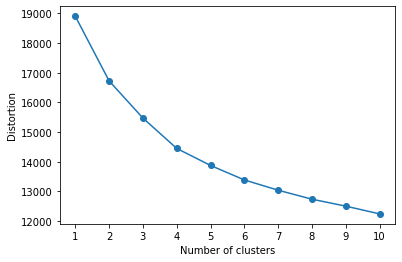

In [83]:
#クラスタリング
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#エルボー法
distortions = []
for i in range(1, 11):              
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                )
    km.fit(new_clustering_data) 
    distortions.append(km.inertia_)
    
# グラフのプロット
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [84]:
#K-Means
n_clusters = 8
km = KMeans(n_clusters=n_clusters)
km.fit_predict(new_clustering_data)
cluster_labels = km.predict(new_clustering_data)

In [85]:
cluster_labels

array([4, 5, 5, ..., 0, 0, 0])

In [86]:
new_anime_data["cluster"] = cluster_labels
new_anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,7
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5


In [87]:
#クラスター0を集計
new_anime_data[new_anime_data["cluster"] == 0].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
48,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.66,49036,0
85,24687,Mushishi Zoku Shou: Odoro no Michi,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.54,34011,0
126,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",Special,1,8.46,159548,0
155,20651,Natsume Yuujinchou: Itsuka Yuki no Hi ni,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",OVA,1,8.40,28302,0
162,264,Hajime no Ippo: Champion Road,"Comedy, Shounen, Sports",Special,1,8.39,47840,0


In [88]:
#クラスター1を集計
new_anime_data[new_anime_data["cluster"] == 1].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,1
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25,8.93,179342,1
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,1
26,17074,Monogatari Series: Second Season,"Comedy, Mystery, Romance, Supernatural, Vampire",TV,26,8.80,205959,1
31,32983,Natsume Yuujinchou Go,"Drama, Fantasy, Shoujo, Slice of Life, Superna...",TV,13,8.76,38865,1


In [89]:
#クラスター2を集計
new_anime_data[new_anime_data["cluster"] == 2].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
17,24701,Mushishi Zoku Shou 2nd Season,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,10,8.88,75894,2
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,2
27,21939,Mushishi Zoku Shou,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,10,8.80,101351,2
36,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973,2
47,22135,Ping Pong The Animation,"Psychological, Seinen, Sports",TV,11,8.67,97187,2


In [90]:
#クラスター3を集計
new_anime_data[new_anime_data["cluster"] == 3].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307,3
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947,3
52,30709,Kamisama Hajimemashita: Kako-hen,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,4,8.64,33422,3
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104,3
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405,3


In [91]:
#クラスター4を集計
new_anime_data[new_anime_data["cluster"] == 4].head(10)

,anime_id,name,genre,type,episodes,rating,members,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,4
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733,4
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,4
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,4
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,4
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,4
33,28957,Mushishi Zoku Shou: Suzu no Shizuku,"Adventure, Fantasy, Historical, Mystery, Seine...",Movie,1,8.75,32266,4
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186,4
37,31757,Kizumonogatari II: Nekketsu-hen,"Action, Mystery, Supernatural, Vampire",Movie,1,8.73,34347,4


In [92]:
#クラスター5を集計
new_anime_data[new_anime_data["cluster"] == 5].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,5
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,5
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,5


In [93]:
#クラスター6を集計
new_anime_data[new_anime_data["cluster"] == 6].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,6
62,32995,Yuri!!! on Ice,"Comedy, Sports",TV,12,8.61,103178,6
99,22789,Barakamon,"Comedy, Slice of Life",TV,12,8.50,225927,6
114,12531,Sakamichi no Apollon,"Drama, Josei, Music, Romance, School",TV,12,8.48,146592,6
118,19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291,6


In [94]:
#クラスター7を集計
new_anime_data[new_anime_data["cluster"] == 7].head(5)

,anime_id,name,genre,type,episodes,rating,members,cluster
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,7
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,7
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,7
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,7
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,7
